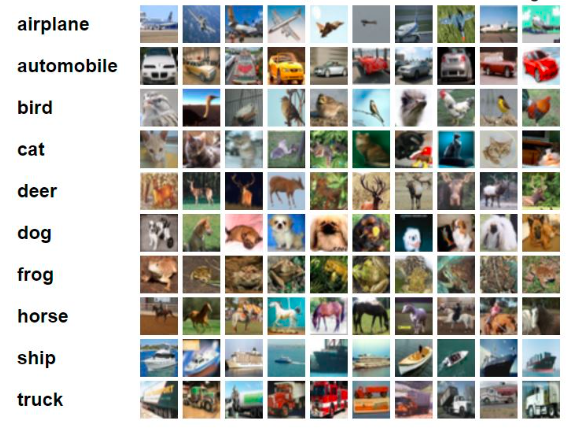

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# load dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
# normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 132s 84ms/step - loss: 1.9242 - accuracy: 0.3098
Epoch 2/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.6296 - accuracy: 0.4233
Epoch 3/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.5544 - accuracy: 0.4503
Epoch 4/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.4866 - accuracy: 0.4754
Epoch 5/10
1563/1563 [==============================] - 129s 83ms/step - loss: 1.4352 - accuracy: 0.4942
Epoch 6/10
1563/1563 [==============================] - 135s 86ms/step - loss: 1.3889 - accuracy: 0.5112
Epoch 7/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.3399 - accuracy: 0.5270
Epoch 8/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.3152 - accuracy: 0.5368
Epoch 9/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.2766 - accuracy: 0.5486
Epoch 10/10
1563/1563 [==============================] 

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.75      0.55      1000
           1       0.69      0.62      0.65      1000
           2       0.49      0.34      0.40      1000
           3       0.38      0.37      0.38      1000
           4       0.52      0.35      0.42      1000
           5       0.57      0.24      0.34      1000
           6       0.51      0.70      0.59      1000
           7       0.44      0.75      0.56      1000
           8       0.76      0.50      0.60      1000
           9       0.63      0.55      0.59      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.54      0.52      0.51     10000



Predicted Label: airplane


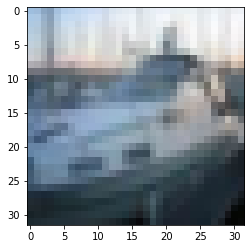

In [40]:
plt.imshow(X_test[2])
print('Predicted Label:',classes[y_pred_classes[2]])

## CNN

In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [34]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.7141 - accuracy: 0.37020s - loss: 1.7150 - accuracy
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1926 - accuracy: 0.5795
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0218 - accuracy: 0.6452
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9266 - accuracy: 0.6803
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8595 - accuracy: 0.7017
Epoch 6/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.7979 - accuracy: 0.7233
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7611 - accuracy: 0.7357
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7177 - accuracy: 0.7506
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6771 - accuracy: 0.7634
Epoch 10/10
1563/1563 [=============

In [41]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.8871 - accuracy: 0.7069 1s - loss: - ETA: 0s - loss: 0.8838 


[0.8871338963508606, 0.7069000005722046]

In [42]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

Predicted Label bu CNN: automobile


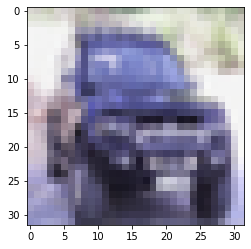

In [47]:
plt.imshow(X_test[9])
print('Predicted Label bu CNN:',classes[y_classes[9]])

## Exercise
Handwritten digits classification using CNN

## ANN

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [49]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

print('X train shape:',X_train.shape)
print('X test shape:',X_test.shape)

X train shape: (60000, 28, 28)
X test shape: (10000, 28, 28)


Label: 5


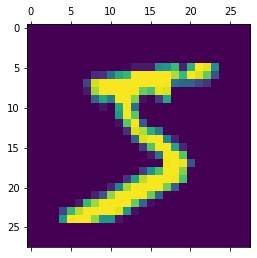

In [50]:
plt.matshow(X_train[0])
print('Label:',y_train[0])

In [51]:
X_train = X_train / 255
X_test = X_test / 255

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4447 - accuracy: 0.8755
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1280 - accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0396 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0304 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0243 - accuracy: 0.9928: 0s - loss: 0.0242 - accu
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] -

In [53]:
y_pred = model.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

Predicted Label bu CNN: 4


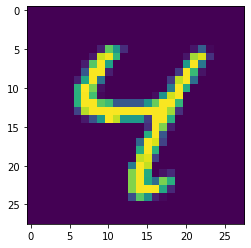

In [55]:
plt.imshow(X_test[6])
print('Predicted Label bu CNN:',y_classes[6])

In [71]:
# CNN
model1= keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [75]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

In [78]:
X_train=np.expand_dims(X_train, axis=3)
X_test=np.expand_dims(X_test, axis=3)

In [79]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3116 - accuracy: 0.9075
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0552 - accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0328 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0215 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0136 - accuracy: 0.99582s - ETA: 0s - loss: 0.0136 - accuracy
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0068 - accuracy: 0.9981
Epoch 8/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0062 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 10/10
1875/1875 [===

In [80]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 2.2997 - accuracy: 0.1239


[2.300699234008789, 0.1264999955892563]

Predicted Label bu CNN: 0


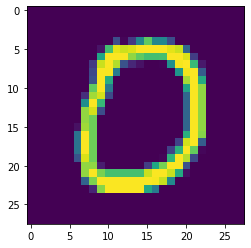

In [82]:
y_pred = model1.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

plt.imshow(X_test[10])
print('Predicted Label bu CNN:',y_classes[10])